In [3]:
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import os
import cv2


In [3]:
from rasterio.plot import show

In [8]:

def resize_images(input_dir, output_dir, target_resolution):
    os.makedirs(output_dir, exist_ok=True)
    image_files = os.listdir(input_dir)

    for filename in image_files:
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        # Read image
        image = cv2.imread(input_path)
        
        # Resize image
        resized_image = cv2.resize(image, target_resolution)
        
        # Save resized image
        cv2.imwrite(output_path, resized_image)

# Specify input and output directories
input_dir = '/home/biswajitrana/Downloads/Data/True_Data/'
output_dir = '/home/biswajitrana/Downloads/Data/Resized_True_Data/'

# Specify target resolution
target_resolution = (532, 300)  # Example: (width, height)

# Resize images and save to output directory
resize_images(input_dir, output_dir, target_resolution)


In [10]:
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Load the image
image = cv2.imread('/home/biswajitrana/Downloads/Data/Noisy_Data/0003_NOISY_SRGB_010.PNG', cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Flatten the image into a 1D array
image_flat = image.flatten().astype(np.float32)

# Apply PCA
n_components = 1  # Choose the number of principal components
pca = PCA(n_components=n_components)
pca.fit(image_flat.reshape(1, -1))  # Reshape to a row vector for PCA

# Transform the image
image_transformed = pca.transform(image_flat.reshape(1, -1))

# Reconstruct the image
image_reconstructed = pca.inverse_transform(image_transformed)

# Reshape the reconstructed image back to its original shape
image_reconstructed = image_reconstructed.reshape(image.shape)

# Optionally, you can visualize the original image and the reconstructed image
cv2.imshow('Original Image', image)
cv2.imshow('Reconstructed Image', image_reconstructed.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


/home/biswajitrana/.local/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:557: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


In [1]:
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Load the high-resolution image
high_res_image = cv2.imread('/home/biswajitrana/Downloads/Data/Noisy_Data/0003_NOISY_SRGB_010.PNG', cv2.IMREAD_GRAYSCALE)

# Specify the size of the chunks
chunk_size = 28

# Extract chunks from the high-resolution image
chunks = []
for i in range(0, high_res_image.shape[0] - chunk_size + 1, chunk_size):
    for j in range(0, high_res_image.shape[1] - chunk_size + 1, chunk_size):
        chunk = high_res_image[i:i+chunk_size, j:j+chunk_size]
        chunks.append(chunk)

# Apply PCA to each chunk
pca = PCA()

denoised_chunks = []
for chunk in chunks:
    # Flatten the chunk into a 1D array
    flattened_chunk = chunk.flatten().astype(np.float32)
    
    # Apply PCA
    pca.fit(flattened_chunk.reshape(-1, 1))
    
    # Select the number of components (e.g., retain 95% of variance)
    n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
    
    # Reapply PCA with selected components
    pca = PCA(n_components=n_components)
    transformed_chunk = pca.fit_transform(flattened_chunk.reshape(-1, 1))
    
    # Inverse transform to reconstruct the denoised chunk
    denoised_chunk = pca.inverse_transform(transformed_chunk).reshape(chunk.shape)
    
    # Append denoised chunk to list
    denoised_chunks.append(denoised_chunk)

# Stack denoised chunks into an array
denoised_image = np.vstack([np.hstack(row) for row in np.array_split(denoised_chunks, high_res_image.shape[0] // chunk_size)])

# Convert to uint8 (0-255) for display
denoised_image = denoised_image.astype(np.uint8)

# Optionally, visualize the original and denoised images
cv2.imshow('Original Image', high_res_image)
cv2.imshow('Denoised Image', denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


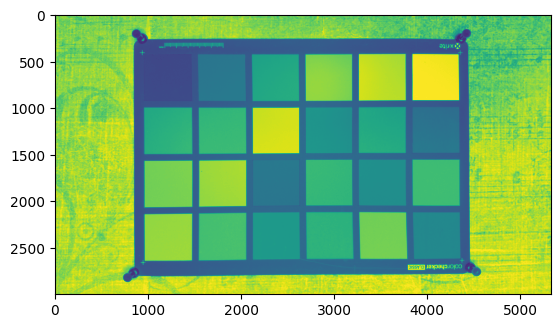

<Axes: >

In [4]:
show(high_res_image)

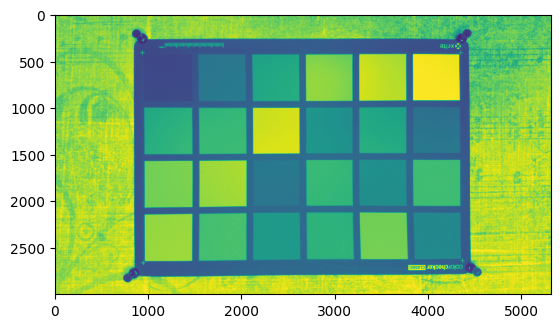

<Axes: >

In [5]:
show(denoised_image)

In [ ]:
# 0002_NOISY_SRGB_011.PNG

In [1]:
# image_name="0098_NOISY_SRGB_010"
image_name="0088_NOISY_SRGB_010"

# PCA

In [2]:
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Load the image
image = cv2.imread(f'/home/biswajitrana/Downloads/Data/Noisy_Data/{image_name}.PNG', cv2.IMREAD_GRAYSCALE)

# Define patch size
patch_height, patch_width = 28, 28

# Extract patches
patches = []
for i in range(0, image.shape[0] - patch_height + 1, patch_height):
    for j in range(0, image.shape[1] - patch_width + 1, patch_width):
        patch = image[i:i+patch_height, j:j+patch_width]
        patches.append(patch)

# Convert patches to numpy array
patches_array = np.array(patches)

# Flatten patches and concatenate them
flattened_patches = patches_array.reshape(patches_array.shape[0], -1)

# Apply PCA
pca = PCA()
pca.fit(flattened_patches)

# Select number of components to retain (e.g., retain 95% of variance)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Reapply PCA with selected components
pca = PCA(n_components=n_components)
transformed_patches = pca.fit_transform(flattened_patches)

# Reconstruct patches
reconstructed_patches = pca.inverse_transform(transformed_patches)

# Reshape patches back to original shape
reconstructed_patches = reconstructed_patches.reshape(patches_array.shape)

# Combine patches to reconstruct the image
reconstructed_image = np.zeros_like(image)
idx = 0
for i in range(0, image.shape[0] - patch_height + 1, patch_height):
    for j in range(0, image.shape[1] - patch_width + 1, patch_width):
        reconstructed_image[i:i+patch_height, j:j+patch_width] = reconstructed_patches[idx]
        idx += 1

# Save the reconstructed image
cv2.imwrite(f'/home/biswajitrana/Downloads/Data/OUTPUT/PCA/{image_name}.jpg', reconstructed_image)


True

# KPCA

In [2]:
import cv2
import numpy as np
from sklearn.decomposition import KernelPCA

In [3]:
# Load the image
# image = cv2.imread(f'/home/biswajitrana/Downloads/Data/Noisy_Data/{image_name}.PNG', cv2.IMREAD_GRAYSCALE)
image = cv2.imread(f'/home/biswajitrana/Downloads/4.1.05.jpg', cv2.IMREAD_GRAYSCALE)

# Define patch size

# Define patch size
patch_height, patch_width = 28, 28

# Initialize list to store reconstructed patches
reconstructed_patches = []

# Define stride size (how much we move the patch window)
stride_height, stride_width = 14, 14

# Extract patches, apply KernelPCA, and reconstruct patches
for i in range(0, image.shape[0] - patch_height + 1, stride_height):
    for j in range(0, image.shape[1] - patch_width + 1, stride_width):
        # Extract patch
        patch = image[i:i+patch_height, j:j+patch_width]
        
        # Flatten patch
        flattened_patch = patch.flatten().astype(np.float32)
        
        # Apply KernelPCA with fit_inverse_transform=True
        kpca = KernelPCA(n_components=50, kernel='rbf', fit_inverse_transform=True)
        transformed_patch = kpca.fit_transform(flattened_patch.reshape(1, -1))
        
        # Reconstruct patch
        reconstructed_patch = kpca.inverse_transform(transformed_patch).reshape(patch.shape)
        
        # Store reconstructed patch
        reconstructed_patches.append(reconstructed_patch)

# Stack reconstructed patches into an array
reconstructed_image = np.zeros_like(image)
for i in range(0, image.shape[0] - patch_height + 1, stride_height):
    for j in range(0, image.shape[1] - patch_width + 1, stride_width):
        reconstructed_image[i:i+patch_height, j:j+patch_width] = reconstructed_patches.pop(0)

# Save the reconstructed image
# cv2.imwrite(f'/home/biswajitrana/Downloads/Data/OUTPUT/KPCA/{image_name}.jpg', reconstructed_image)
cv2.imwrite(f'/home/biswajitrana/Downloads/home.jpg', reconstructed_image)


True

In [8]:
import numpy as np
import cv2
from sklearn.decomposition import KernelPCA

# Load the image
image = cv2.imread('/home/biswajitrana/Downloads/4.1.05.jpg', cv2.IMREAD_GRAYSCALE)

# Normalize pixel values to range [0, 1]
image = image.astype(np.float64) / 255.0

# Define the patch size
patch_size = 200  # Adjust as needed based on your available memory and image characteristics

# Define the sliding window step size
step_size = 50  # Adjust as needed based on your preference

# Initialize lists to store patch coordinates and patch data
patch_coords = []
patch_data = []

# Extract patches from the image using sliding window
for y in range(0, image.shape[0] - patch_size + 1, step_size):
    for x in range(0, image.shape[1] - patch_size + 1, step_size):
        patch = image[y:y + patch_size, x:x + patch_size]
        patch_coords.append((y, x))
        patch_data.append(patch.flatten())

# Convert patch data to numpy array
patch_data = np.array(patch_data)

# Perform KPCA on patch data
kpca = KernelPCA(n_components=100, kernel='rbf', gamma=0.1, fit_inverse_transform=True)
denoised_patch_data = kpca.fit_transform(patch_data)

try:
    # Reconstruct denoised patches
    reconstructed_patch_data = kpca.inverse_transform(denoised_patch_data)

    # Reshape the reconstructed patches to their original shapes
    reconstructed_patches = [patch.reshape(patch_size, patch_size) for patch in reconstructed_patch_data]

    # Initialize a blank image to store the denoised result
    denoised_image = np.zeros_like(image)

    # Place the denoised patches back into the image using the patch coordinates
    for i, (y, x) in enumerate(patch_coords):
        denoised_image[y:y + patch_size, x:x + patch_size] = reconstructed_patches[i]

    # Convert the denoised image back to uint8 format
    denoised_image_uint8 = (denoised_image * 255).astype(np.uint8)

    # Save the denoised image
    cv2.imwrite('/home/biswajitrana/Downloads/home2.jpg', denoised_image_uint8)
except ValueError as e:
    print("Error:", e)


# Wavelet

In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import KernelPCA
from tqdm import tqdm

def custom_kernel(X, Y):
    # Ensure X and Y are reshaped to be 2-dimensional arrays if they are not already
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)

    a = 22.36  # You can adjust this parameter as needed
    d = X.shape[1]  # Dimensionality of the input data

    # Initialize kernel matrix
    K = np.zeros((X.shape[0], Y.shape[0]))

    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            # Compute the product term
            product_term = 1
            for k in range(d):
                product_term *= np.cos(5 * (x[k] - y[k]) / a) * np.exp(-((x[k] - y[k]) ** 2) / (2 * a ** 2))
            # Update the kernel matrix with the product term
            K[i, j] = product_term

    return K

# Load the image
image = cv2.imread('/content/drive/MyDrive/Data/Noisy_Data/0003_NOISY_SRGB_010.PNG', cv2.IMREAD_GRAYSCALE)

# Define patch size
patch_height, patch_width = 37, 25

# Define stride size
stride_height, stride_width = 18, 12

# Initialize list to store reconstructed patches
reconstructed_patches = []

# Extract patches, apply Custom Kernel PCA, and reconstruct patches
for i in tqdm(range(0, image.shape[0] - patch_height + 1, stride_height)):
    reconstructed_patch_row = []
    for j in range(0, image.shape[1] - patch_width + 1, stride_width):
        # Extract patch
        patch = image[i:i+patch_height, j:j+patch_width]
        
        # Flatten patch
        flattened_patch = patch.flatten().astype(np.float32)
        
        # Apply Custom Kernel PCA with fit_inverse_transform=True
        kernel_pca = KernelPCA(
            kernel=custom_kernel, fit_inverse_transform=True, n_components=400,
            random_state=42
        )
        transformed_patch = kernel_pca.fit_transform(flattened_patch.reshape(1, -1))
        
        # Reconstruct patch
        reconstructed_patch = kernel_pca.inverse_transform(transformed_patch).reshape(patch.shape)
        
        # Store reconstructed patch
        reconstructed_patch_row.append(reconstructed_patch)

    reconstructed_patches.append(reconstructed_patch_row)

# Stack reconstructed patches into an array
reconstructed_image = np.zeros_like(image)
for i, reconstructed_patch_row in enumerate(reconstructed_patches):
    for j, reconstructed_patch in enumerate(reconstructed_patch_row):
        reconstructed_image[i*stride_height:i*stride_height+patch_height, j*stride_width:j*stride_width+patch_width] = reconstructed_patch

# Save the reconstructed image
cv2.imwrite('0003_NOISY_SRGB_010_wavelet.jpg', reconstructed_image)


# MEAN and MEDIAN Filter

Image loaded successfully: (3024, 4032, 3)


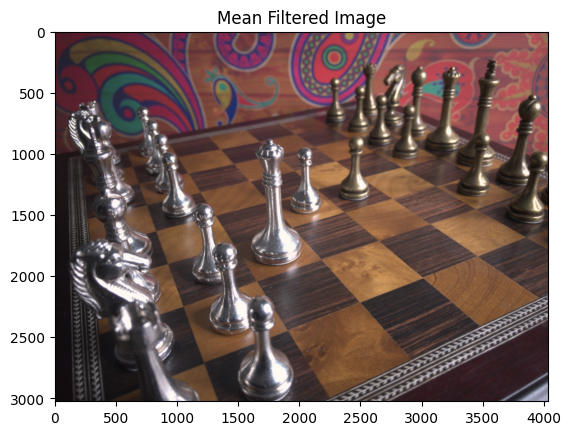

In [3]:
import matplotlib.pyplot as plt
import cv2


image_path = 'C:\\Users\\biswajit\\Downloads\DAta\\True\\0088_GT_SRGB_010.PNG'
noisy_image = cv2.imread(image_path)

if noisy_image is None:
    print(f"Error: Unable to load the image from {image_path}")
else:
    print(f"Image loaded successfully: {noisy_image.shape}")


    # Apply mean filter
    mean_filtered = cv2.blur(noisy_image, (5, 5))  # You can adjust the kernel size (e.g., (5, 5))

    # Apply median filter
    median_filtered = cv2.medianBlur(noisy_image, 5)  # You can adjust the kernel size (e.g., 5)

    # Save the images
    # cv2.imwrite('original_image.jpg', image)
    cv2.imwrite('C:\\Users\\biswajit\\Downloads\\DAta\\mean_filter\\0088_GT_SRGB_010.PNG', mean_filtered)
    cv2.imwrite('C:\\Users\\biswajit\\Downloads\\DAta\\median_filter\\0088_GT_SRGB_010.PNG', median_filtered)

    # Display the images
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Noisy Image')
    plt.imshow(cv2.cvtColor(mean_filtered, cv2.COLOR_BGR2RGB)), plt.title('Mean Filtered Image')